<a href="https://colab.research.google.com/github/JamesHummer/BioinformaticsFunctions/blob/main/Homework3_JH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this notebook to run your homework

First, we will upload the counts table that we generated last week (it was the class activity), the solution will be posted Monday.

In [ ]:
from google.colab import files
uploaded = files.upload('counts.txt')

FileExistsError: [Errno 17] File exists: 'counts.txt'

In [ ]:
!apt-get update
!apt-get install -y cuda-toolkit-11-8

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,398 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,817 kB]
Get:14 http://security.ubu

In [ ]:
!pip install pydeseq2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 6.3 MB/s eta 0:00:00


In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [ ]:
!gdown 1cX07oqLAzaxgpY6Ywhz770aUu0Tl2OTB

Downloading...
From: https://drive.google.com/uc?id=1cX07oqLAzaxgpY6Ywhz770aUu0Tl2OTB
To: /content/fibrosis_smoc2_rawcounts.csv
100% 1.91M/1.91M [00:00<00:00, 14.1MB/s]


In [ ]:
counts = pd.read_csv('fibrosis_smoc2_rawcounts.csv', sep=',', comment='#')

In [ ]:
counts

,Unnamed: 0,smoc2_fibrosis1,smoc2_fibrosis4,smoc2_normal1,smoc2_normal3,smoc2_fibrosis3,smoc2_normal4,smoc2_fibrosis2
0,ENSMUSG00000102693,0,0,0,0,0,0,0
1,ENSMUSG00000064842,0,0,0,0,0,0,0
2,ENSMUSG00000051951,72,30,0,3,36,1,51
3,ENSMUSG00000102851,0,0,0,0,0,0,0
4,ENSMUSG00000103377,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
47724,ENSMUSG00000094431,0,0,0,0,0,0,0
47725,ENSMUSG00000094621,0,1,0,0,0,1,0
47726,ENSMUSG00000098647,0,0,0,0,0,0,0
47727,ENSMUSG00000096730,0,0,0,0,0,0,0


Subset the table to include only the columns with the Gene ID and the counts per sam file

In [ ]:
counts = pd.read_csv('counts.txt', sep ='\t', comment = '#')

In [ ]:
counts.columns.tolist()


['Geneid',
 'Chr',
 'Start',
 'End',
 'Strand',
 'Length',
 'Aln_basallactate_01.sam',
 'Aln_basallactate_02.sam',
 'Aln_basalpregnant_01.sam',
 'Aln_basalpregnant_02.sam',
 'Aln_basalvirgin_01.sam',
 'Aln_basalvirgin_02.sam',
 'Aln_luminallactate_01.sam',
 'Aln_luminallactate_02.sam',
 'Aln_luminalpregnant_01.sam',
 'Aln_luminalpregnant_02.sam',
 'Aln_luminalvirgin_01.sam',
 'Aln_luminalvirgin_02.sam']

In [ ]:
new_counts = counts[['Geneid','Aln_basallactate_01.sam','Aln_basallactate_02.sam','Aln_basalpregnant_01.sam','Aln_basalpregnant_02.sam','Aln_basalvirgin_01.sam','Aln_basalvirgin_02.sam','Aln_luminallactate_01.sam','Aln_luminallactate_02.sam','Aln_luminalpregnant_01.sam','Aln_luminalpregnant_02.sam','Aln_luminalvirgin_01.sam','Aln_luminalvirgin_02.sam']]

In [ ]:
new_counts.head()

,Geneid,Aln_basallactate_01.sam,Aln_basallactate_02.sam,Aln_basalpregnant_01.sam,Aln_basalpregnant_02.sam,Aln_basalvirgin_01.sam,Aln_basalvirgin_02.sam,Aln_luminallactate_01.sam,Aln_luminallactate_02.sam,Aln_luminalpregnant_01.sam,Aln_luminalpregnant_02.sam,Aln_luminalvirgin_01.sam,Aln_luminalvirgin_02.sam
0,ENSMUSG00000102693,0,0,0,0,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,0,0,0
3,ENSMUSG00000102851,0,0,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_counts = new_counts.set_index('Geneid')

In [ ]:
new_counts = new_counts[new_counts.sum(axis = 1) > 0]

In [ ]:
new_counts

,Aln_basallactate_01.sam,Aln_basallactate_02.sam,Aln_basalpregnant_01.sam,Aln_basalpregnant_02.sam,Aln_basalvirgin_01.sam,Aln_basalvirgin_02.sam,Aln_luminallactate_01.sam,Aln_luminallactate_02.sam,Aln_luminalpregnant_01.sam,Aln_luminalpregnant_02.sam,Aln_luminalvirgin_01.sam,Aln_luminalvirgin_02.sam
Geneid,,,,,,,,,,,,
ENSMUSG00000025903,0,0,0,0,1,0,0,0,0,0,0,0
ENSMUSG00000045210,0,0,0,0,0,1,0,0,0,0,0,0
ENSMUSG00000025917,0,0,0,0,1,0,0,0,0,0,0,0
ENSMUSG00000025935,0,0,0,0,0,0,0,0,0,0,0,1
ENSMUSG00000025937,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000035818,0,2,1,0,0,0,0,0,0,0,0,0
ENSMUSG00000025085,0,1,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000054843,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
new_counts = new_counts.T


In [ ]:
new_counts

Geneid,ENSMUSG00000025903,ENSMUSG00000045210,ENSMUSG00000025917,ENSMUSG00000025935,ENSMUSG00000025937,ENSMUSG00000043716,ENSMUSG00000025921,ENSMUSG00000079658,ENSMUSG00000101685,ENSMUSG00000026158,...,ENSMUSG00000084957,ENSMUSG00000024976,ENSMUSG00000024981,ENSMUSG00000024982,ENSMUSG00000024985,ENSMUSG00000035818,ENSMUSG00000025085,ENSMUSG00000054843,ENSMUSG00000024991,ENSMUSG00000024997
Aln_basallactate_01.sam,0,0,0,0,0,2,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
Aln_basallactate_02.sam,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,1,0,0,0
Aln_basalpregnant_01.sam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
Aln_basalpregnant_02.sam,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Aln_basalvirgin_01.sam,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aln_basalvirgin_02.sam,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aln_luminallactate_01.sam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Aln_luminallactate_02.sam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aln_luminalpregnant_01.sam,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
Aln_luminalpregnant_02.sam,0,0,0,0,0,2,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


Here we will generate a metadata table, we will use abreviations for each conditions, BL for basal lactate, BP Basal pregnant, BV, basal virgin, etc. We will use these later when we contrast conditions.

In [ ]:
metadata = pd.DataFrame(zip(new_counts.index, ['BL','BL','BP','BP', 'BV', 'BV', 'LL', 'LL','LP','LP','LV','LV']),
                        columns = ['Sample', 'Condition'])

In [ ]:
metadata = metadata.set_index('Sample')

In [ ]:
dds = DeseqDataSet(counts=new_counts,
            metadata=metadata,
            design_factors="Condition")


/tmp/ipython-input-1376137771.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=new_counts,


In [ ]:
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 3.22 seconds.

Fitting dispersion trend curve...
/usr/local/lib/python3.12/dist-packages/pydeseq2/dds.py:820: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 3.99 seconds.

Fitting LFCs...
... done in 8.89 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



In [ ]:
dds

AnnData object with n_obs × n_vars = 12 × 3743
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

## Note: Here is where you make the first significant change, pick two treatmetns to contrast, there are plenty of permutations for students to get slighly different figures!

In the example below I am comparing BP vs BV, but you can compare other conditions.

In [ ]:
dds.obs['Condition'].unique()

array(['BL', 'BP', 'BV', 'LL', 'LP', 'LV'], dtype=object)

In [ ]:
stat_res = DeseqStats(dds, n_cpus=2, contrast = ('Condition','LL','LV'))

In [ ]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition LL vs LV
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                       
ENSMUSG00000025903  0.063812        2.453428  6.024958  0.407211  0.683853   
ENSMUSG00000045210  0.038287        2.453428  6.024958  0.407211  0.683853   
ENSMUSG00000025917  0.063812        2.453428  6.024958  0.407211  0.683853   
ENSMUSG00000025935  0.031906        1.048804  5.725118  0.183193  0.854646   
ENSMUSG00000025937  0.031906        1.048804  5.725118  0.183193  0.854646   
...                      ...             ...       ...       ...       ...   
ENSMUSG00000035818  0.255248        2.453428  6.024947  0.407212  0.683853   
ENSMUSG00000025085  0.095718        2.453428  6.024952  0.407211  0.683853   
ENSMUSG00000054843  0.191436        2.453428  6.024958  0.407211  0.683853   
ENSMUSG00000024991  0.255248        2.453428  6.024958  0.407211  0.683853   
ENSMUSG

... done in 5.50 seconds.



In [ ]:
res = stat_res.results_df

In [ ]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSMUSG00000025903,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196
ENSMUSG00000045210,0.038287,2.453428,6.024958,0.407211,0.683853,0.906196
ENSMUSG00000025917,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196
ENSMUSG00000025935,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196
ENSMUSG00000025937,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196
...,...,...,...,...,...,...
ENSMUSG00000035818,0.255248,2.453428,6.024947,0.407212,0.683853,0.906196
ENSMUSG00000025085,0.095718,2.453428,6.024952,0.407211,0.683853,0.906196
ENSMUSG00000054843,0.191436,2.453428,6.024958,0.407211,0.683853,0.906196


Here we add annotations (symbols to each geneid

In [ ]:
!pip install sanbomics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00


In [ ]:
from sanbomics.tools import id_map

In [ ]:
mapper = id_map(species = 'mouse')

In [ ]:
res['Symbol'] = res.index.map(mapper.mapper)

In [ ]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSMUSG00000025903,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196,Lypla1
ENSMUSG00000045210,0.038287,2.453428,6.024958,0.407211,0.683853,0.906196,Vcpip1
ENSMUSG00000025917,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196,Cops5
ENSMUSG00000025935,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196,Tram1
ENSMUSG00000025937,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196,Lactb2
...,...,...,...,...,...,...,...
ENSMUSG00000035818,0.255248,2.453428,6.024947,0.407212,0.683853,0.906196,Plekhs1
ENSMUSG00000025085,0.095718,2.453428,6.024952,0.407211,0.683853,0.906196,Ablim1
ENSMUSG00000054843,0.191436,2.453428,6.024958,0.407211,0.683853,0.906196,Atrnl1


Here we change subset for genes with the largest effect size (log 2 fold change > 0.5).
We should also sellect for significnacy but due to the size of our dataset, we do not have the power to do it!


In [ ]:
sigs = res[(abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSMUSG00000025903,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196,Lypla1
ENSMUSG00000045210,0.038287,2.453428,6.024958,0.407211,0.683853,0.906196,Vcpip1
ENSMUSG00000025917,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196,Cops5
ENSMUSG00000025935,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196,Tram1
ENSMUSG00000025937,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196,Lactb2
...,...,...,...,...,...,...,...
ENSMUSG00000035818,0.255248,2.453428,6.024947,0.407212,0.683853,0.906196,Plekhs1
ENSMUSG00000025085,0.095718,2.453428,6.024952,0.407211,0.683853,0.906196,Ablim1
ENSMUSG00000054843,0.191436,2.453428,6.024958,0.407211,0.683853,0.906196,Atrnl1


Let's look for batch effects! RUn a PCA

In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.0 MB/s eta 0:00:00


In [ ]:
import scanpy as sc

In [ ]:
sc.tl.pca(dds)

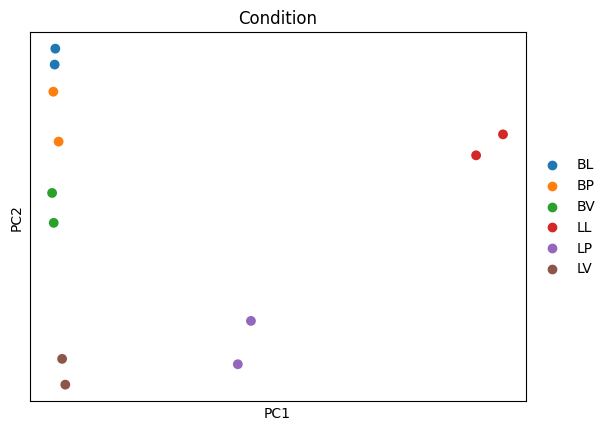

In [ ]:
sc.pl.pca(dds, color = 'Condition', size = 200)

Lets Generate a heatmap and then a volcano plot!

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
dds.layers['normed_counts']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.76574333,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.29723   , 2.29723   ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [ ]:
dds.layers['log1p']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.56857175,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.19308272, 1.19308272,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSMUSG00000025903,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196,Lypla1
ENSMUSG00000045210,0.038287,2.453428,6.024958,0.407211,0.683853,0.906196,Vcpip1
ENSMUSG00000025917,0.063812,2.453428,6.024958,0.407211,0.683853,0.906196,Cops5
ENSMUSG00000025935,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196,Tram1
ENSMUSG00000025937,0.031906,1.048804,5.725118,0.183193,0.854646,0.906196,Lactb2
...,...,...,...,...,...,...,...
ENSMUSG00000035818,0.255248,2.453428,6.024947,0.407212,0.683853,0.906196,Plekhs1
ENSMUSG00000025085,0.095718,2.453428,6.024952,0.407211,0.683853,0.906196,Ablim1
ENSMUSG00000054843,0.191436,2.453428,6.024958,0.407211,0.683853,0.906196,Atrnl1


In [ ]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 12 × 3629
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [ ]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


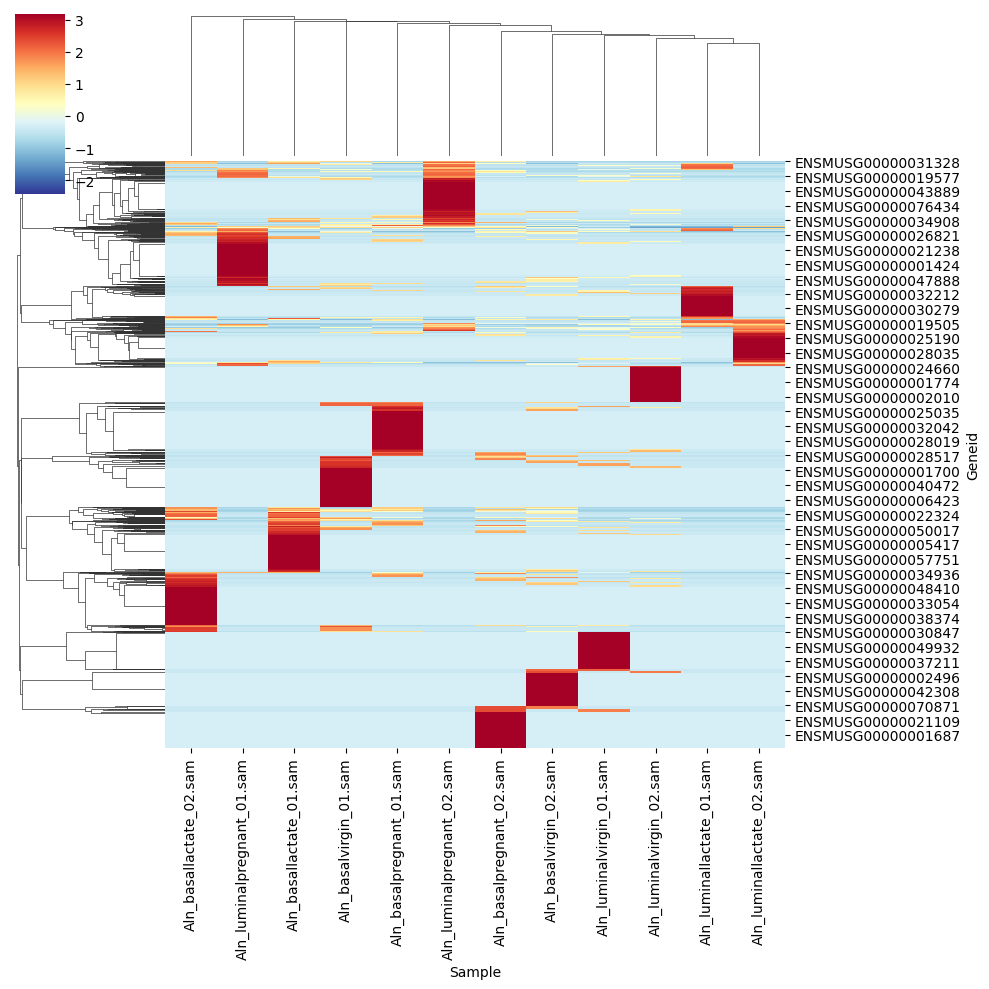

In [ ]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
from sanbomics.plots import volcano

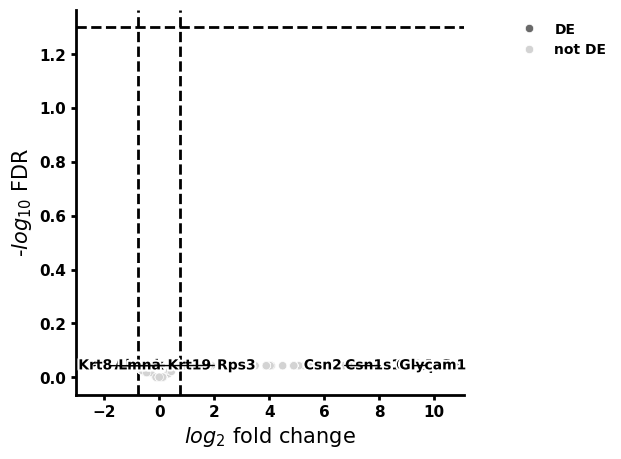

In [ ]:
volcano(res, symbol='Symbol')